In [41]:
import pandas as pd
from matplotlib import pyplot as plt


I dati sono presenti nella pagina

https://www.agcom.it/dati-elementari-di-monitoraggio-televisivo

... solo che sono fermi a febbraio 2021

Elaboriamo la risorsa che si trova qui 

https://www.agcom.it/visualizza-documento/7a76bc85-1212-4686-a994-e4147fd8cc46

In [21]:
url = "https://www.agcom.it/documents/10179/25952154/Dati+monitoraggio+22-02-2022/7a76bc85-1212-4686-a994-e4147fd8cc46?version=1.0"

Questo un esempio del codice XML
```xml
<?xml version="1.0" encoding="utf-8"?>
<DATI>
  <LICENZA>
    <TESTO><![CDATA[Il riuso dei dati di monitoraggio pubblicati in questa sezione è ammesso secondo quanto previsto dalla licenza Creative Commons Attribuzione 4.0 Internazionale (CC BY-NC-SA 4.0), disponibile all'indirizzo https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode.it). A tal fine in ogni lavoro o opera derivata basata, anche in minima parte, sui dati di monitoraggio Agcom dovrà essere riportato il logo presente al seguente link https://www.agcom.it/monitoraggio-televisivo-e-radiofonico.]]></TESTO>
  </LICENZA>
  <RECORD>
    <CANALE>CANALE</CANALE>
    <PROGRAMMA>PROGRAMMA</PROGRAMMA>
    <DATA>data</DATA>
    <COGNOME>COGNOME</COGNOME>
    <NOME>NOME</NOME>
    <MICRO_CATEGORIA>MICRO</MICRO_CATEGORIA>
    <ARGOMENTO>ARGOMENTO</ARGOMENTO>
    <DURATA>DURATA</DURATA>
    <TIPO_TEMPO>TIPO</TIPO_TEMPO>
```

Attenzione: 
- l'encoding è sicuramente *sbagliato*
- bisogna prendere i dati contenuti nel tag RECORD

In [25]:
# l'encoding non è quello corretto
df = pd.read_xml(url,encoding='utf-8', parser='lxml')

escludo la prima e la seconda riga

In [33]:
df = df.iloc[2:, :]


ed escludo la colonna TESTO

In [31]:
del df['TESTO']

In [34]:
df

,CANALE,PROGRAMMA,DATA,COGNOME,NOME,MICRO_CATEGORIA,ARGOMENTO,DURATA,TIPO_TEMPO
3,CANALE 5,TG5,01.10.2021,Fornaro,Federico,Liberi e Uguali,Politica e attivit� istituzionali,9,Notizia
4,CANALE 5,TG5,01.10.2021,Letta,Enrico,Partito Democratico,Politica e attivit� istituzionali,191,Notizia
5,CANALE 5,TG5 PRIMA PAGINA,01.10.2021,Berlusconi,Silvio,PDL - Forza Italia,Politica e attivit� istituzionali,290,Notizia
6,CANALE 5,TG5 PRIMA PAGINA,01.10.2021,PDL - Forza Italia,Soggetto collettivo,PDL - Forza Italia,Politica e attivit� istituzionali,27,Notizia
7,CANALE 5,TG5,01.10.2021,Fidanza,Carlo,Fratelli d'Italia,Politica e attivit� istituzionali,6,Notizia
...,...,...,...,...,...,...,...,...,...
20192,TV8,SKY TG24 - BUONGIORNO,29.10.2021,Renzi,Matteo,Italia Viva,Politica e attivit� istituzionali,10,Parola
20193,TV8,SKY TG24 - BUONGIORNO,29.10.2021,Letta,Enrico,Partito Democratico,Politica e attivit� istituzionali,15,Parola
20194,TV8,SKY TG24 - BUONGIORNO,29.10.2021,Salvini,Matteo,Lega Nord,Politica e attivit� istituzionali,15,Parola
20195,TV8,SKY TG24,30.10.2021,Di Mare,Giuseppe,Altro,Politica e attivit� istituzionali,60,Parola


In [46]:
df.COGNOME.value_counts().head(5)

Salvini       1324
Letta          953
Meloni         885
Conte          777
Berlusconi     527
Name: COGNOME, dtype: int64

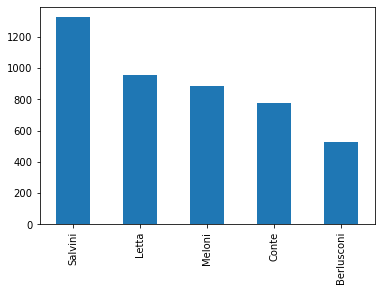

In [47]:
df.COGNOME.value_counts().head(5).plot(kind='bar')
plt.show()